## Автоматическое дифференцирование

In [2]:
import torch
from torch import nn
from torch import autograd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
x = torch.arange(4).type(torch.float)
print(x)

tensor([0., 1., 2., 3.])


## Присоединение градиента к `x`

- Говорит системе, что мы хотим хранить градиент

In [4]:
x.requires_grad

False

In [5]:
x = x.requires_grad_()

In [6]:
x.requires_grad

True

In [7]:
x.grad

## Forward Propagation (Метод Прямого распространения)

Найдем решение в заданной функции:

$$y = 2\mathbf{x}^{\top}\mathbf{x}$$

In [8]:
y = 2 * x.dot(x.T)
# y2 = 2 * x.dot(x.T)

In [9]:
y

tensor(28., grad_fn=<MulBackward0>)

## Backward Propagation

In [10]:
y.backward()

## Получение градиента

$y = 2\mathbf{x}^{\top}\mathbf{x}$, значит 

$$\frac{\partial y}{\partial \mathbf x} = 4\mathbf{x}$$

Проверим:

In [13]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [11]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [12]:
4 * x == x.grad

tensor([True, True, True, True])

## no_grad

функция no_grad позволяет отключить вычисление градиента для части кода

In [14]:
y = 2 * x.dot(x)
print(y.grad_fn)

with torch.no_grad():
    y = 2 * x.dot(x)
    print(y.grad_fn)

None


In [15]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [16]:
y = 2 * x.dot(x)
y.backward()
print(x.grad)

# new version with torch.inference_mode():
with torch.no_grad():
    y = 2 * x.dot(x)
    y.backward()
    print(x.grad)

tensor([ 0.,  8., 16., 24.])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Гибкий граф

In [18]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [19]:
a = torch.randn(1).requires_grad_()
d = f(a)
d.backward()

In [20]:
d

tensor([1609.1349], grad_fn=<MulBackward0>)

In [21]:
a

tensor([0.7857], requires_grad=True)

In [22]:
from matplotlib import pyplot as plt

x= torch.tensor([1,1.5,2,3,4])
y= torch.tensor([2,2.1,3,4,2])


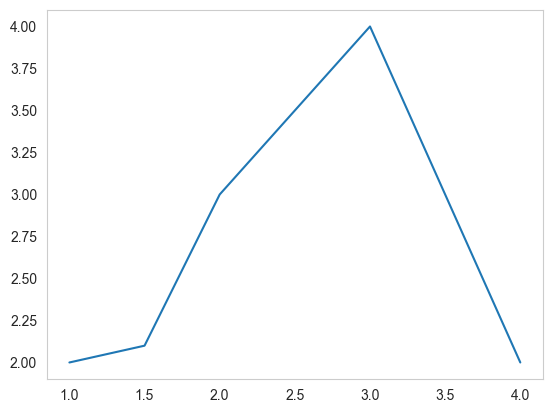

In [23]:
plt.plot(x,y)
plt.grid()
plt.show()

## Практика

1. Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$ используя пакет autograd'а для расчета производных (т.е. нельзя выводить производную явно)

In [24]:
import seaborn as sns

def f(x):
    return torch.sin(x)*x

x = torch.linspace(-10, 10, 1000).requires_grad_()

In [28]:
y = f(x)

In [29]:
y

tensor([-5.4402e+00, -5.2606e+00, -5.0796e+00, -4.8972e+00, -4.7135e+00,
        -4.5287e+00, -4.3427e+00, -4.1558e+00, -3.9679e+00, -3.7791e+00,
        -3.5896e+00, -3.3994e+00, -3.2085e+00, -3.0172e+00, -2.8254e+00,
        -2.6332e+00, -2.4407e+00, -2.2481e+00, -2.0553e+00, -1.8625e+00,
        -1.6697e+00, -1.4770e+00, -1.2846e+00, -1.0924e+00, -9.0055e-01,
        -7.0916e-01, -5.1829e-01, -3.2800e-01, -1.3839e-01,  5.0475e-02,
         2.3851e-01,  4.2567e-01,  6.1184e-01,  7.9697e-01,  9.8098e-01,
         1.1638e+00,  1.3454e+00,  1.5256e+00,  1.7044e+00,  1.8818e+00,
         2.0576e+00,  2.2318e+00,  2.4043e+00,  2.5751e+00,  2.7441e+00,
         2.9113e+00,  3.0765e+00,  3.2397e+00,  3.4009e+00,  3.5600e+00,
         3.7169e+00,  3.8715e+00,  4.0240e+00,  4.1740e+00,  4.3217e+00,
         4.4670e+00,  4.6098e+00,  4.7500e+00,  4.8877e+00,  5.0228e+00,
         5.1551e+00,  5.2848e+00,  5.4117e+00,  5.5358e+00,  5.6571e+00,
         5.7754e+00,  5.8909e+00,  6.0034e+00,  6.1

In [30]:
y.backward(torch.ones_like(y))

In [33]:
dx = x.grad

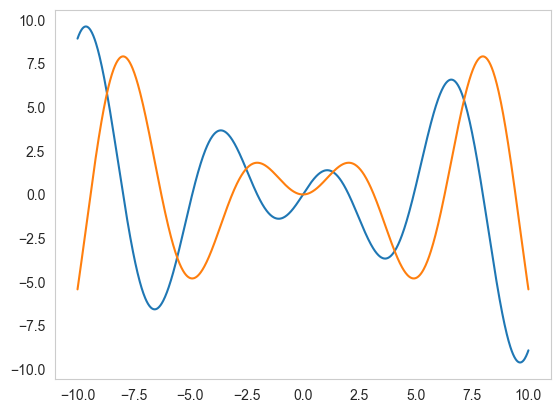

In [35]:
plt.plot(x.detach().numpy(), dx)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.grid()

## Линейная регрессия с нуля

In [55]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

## Генерируем данные

- Случайно генерируем $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$
- Выбираем значения весов (истинные): $\mathbf{w} = [2, -3.4]^\top$ и свободного члена $b = 4.2$
- Генерируем метки по формле $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$
  с шумом $\epsilon$ нормально распределнным с мат ожиданием 0 и дисперсией 1

In [57]:
num_inputs = 2
num_examples = 1000

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features = torch.randn((num_examples, num_inputs))
labels = torch.mv(features, true_w) + true_b

labels += torch.randn(labels.shape)

## Визуализируем данные

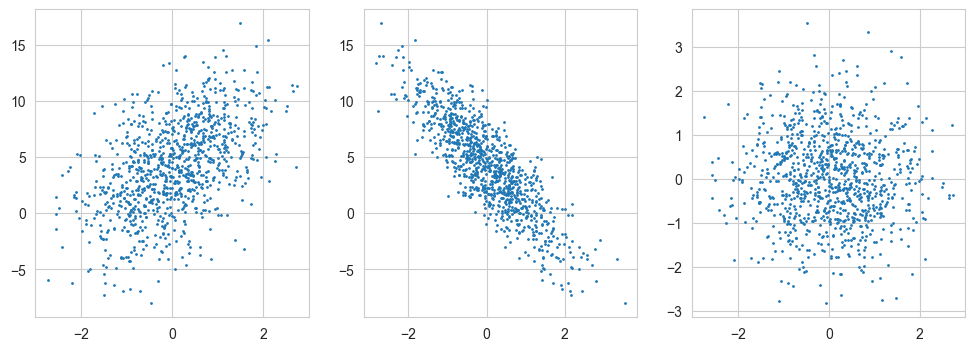

In [58]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(features[:, 0], labels, 1)
plt.subplot(132)
plt.scatter(features[:, 1], labels, 1)
plt.subplot(133)
plt.scatter(features[:, 0], features[:, 1], 1)
plt.show()


## Чтение данных

Итерируемся по датасету и возвращаем случаные `batch_size` примеров.

In [59]:
import random

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i: min(i + batch_size, num_examples)]
        yield features[j, :], labels[j]

## Выводим маленький батч

In [60]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[-0.0683,  1.2681],
        [ 0.5561,  0.1394],
        [ 0.2710, -1.2559],
        [ 0.5105, -0.8537],
        [ 0.5774,  0.3095],
        [-0.3308,  0.7521],
        [-0.7569,  0.7434],
        [ 0.8654, -0.4002],
        [ 0.5438,  0.5824],
        [ 1.7466, -1.5270]]) 
 tensor([-0.1530,  2.7679,  9.4913,  6.9002,  3.7241,  0.1860,  0.3360,  6.7766,
         3.6005, 11.7080])


### Создаем нашу модель для обучения

In [61]:
w = torch.randn((num_inputs))
b = torch.zeros((1,))

In [62]:
w.requires_grad_()
b.requires_grad_()

tensor([0.], requires_grad=True)

## Практика - реализуйте функции:
- linreg - применение модели линейной регресии
- squared_loss - MSE функция потерь
- sgd - стохастический шаг градиентного спуска по массиву параметров

и допишите код обучения линейной регрессии

In [63]:
def linreg(X, w, b):
    return torch.mv(X, w) + b

def squared_loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape)) ** 2).mean()

def sgd(params, lr):
    for param in params:
        param.data[:] = param - lr*param.grad

### Обучение

In [64]:
lr = 0.01  
num_epochs = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):   
        w = w.detach()
        b = b.detach()

        w.requires_grad_()
        b.requires_grad_()
        
        l = squared_loss(linreg(X,w,b), y)
        l.backward()

        sgd([w,b], lr)

    train_l = squared_loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 1.663125
epoch 2, loss 1.068314
epoch 3, loss 1.052300
epoch 4, loss 1.052159
epoch 5, loss 1.052084
epoch 6, loss 1.052943
epoch 7, loss 1.052334
epoch 8, loss 1.052255
epoch 9, loss 1.052122
epoch 10, loss 1.052198


## Оценка качества модели

In [65]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w tensor([ 0.0174, -0.0177], grad_fn=<SubBackward0>)
Error in estimating b tensor([-0.0011], grad_fn=<RsubBackward1>)
tensor([ 1.9826, -3.3823], requires_grad=True)
tensor([4.2011], requires_grad=True)


## Линейная регрессия на torch

In [66]:
from torch.utils.data import TensorDataset, DataLoader

In [67]:
num_inputs = 2
num_examples = 1000

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features = torch.randn((num_examples, num_inputs))

labels = torch.mv(features, true_w) + true_b
labels += torch.randn(labels.shape)

In [69]:
batch_size = 10
dataset = TensorDataset(features, labels)

# Randomly reading mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=True)

# Read a batch to see how it works
for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.3496,  0.2812],
        [ 0.3070, -0.7991],
        [-0.3893, -0.2023],
        [ 0.0812,  0.5397],
        [ 0.9907, -0.9967],
        [-0.6404, -0.8519],
        [-0.0375, -1.3567],
        [-1.8484, -0.1156],
        [-1.1024,  0.2338],
        [ 0.7474, -0.7167]]) tensor([ 2.5116,  6.1786,  4.4496,  0.8120,  9.7819,  7.4392,  8.0253,  0.2106,
        -0.1188,  9.6058])


In [70]:
X * w + b

tensor([[3.5079, 3.2500],
        [4.8097, 6.9039],
        [3.4292, 4.8852],
        [4.3621, 2.3757],
        [6.1651, 7.5723],
        [2.9314, 7.0823],
        [4.1267, 8.7899],
        [0.5364, 4.5921],
        [2.0154, 3.4102],
        [5.6829, 6.6250]], grad_fn=<AddBackward0>)

In [71]:
model = torch.nn.Sequential(torch.nn.Linear(2, 1)) # (количество входов, количетво выходов) -> у нас всего два признака и соответственно 1 предсказание

In [72]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [73]:
# Мы можем обращаться к нашей модели, например взять её первый слой обратиться к весам модели и значениям и задать свои значния (НЕ ЗАПУСКАТЬ просто пример)
model[0].weight.data = true_w.clone().detach().requires_grad_(True).reshape((1, 2))
model[0].bias.data = torch.tensor([true_b], requires_grad = True)

In [81]:
# Задаем функцию ошибки
loss = torch.nn.MSELoss(reduction='mean')

In [82]:
# Задаем оптимизиатор
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

In [76]:
test_tensor = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])

In [77]:
labels.shape

torch.Size([1000])

In [78]:
model(test_tensor).shape

torch.Size([3, 1])

In [79]:
model(test_tensor).reshape(-1)

tensor([-0.6000, -3.4000, -6.2000], grad_fn=<ReshapeAliasBackward0>)

In [83]:
# Определились с моделью, с функцией потерь и оптимизатором теперь самое время обучить модель линейной регрессии
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).reshape(-1), y) #  необходимо привести к той форме (вектор-строка) чтобы она совпадала с вектором строкой реальных значений
        l.backward()
        trainer.step()
    l = loss(model(features).reshape(-1), labels)
    if epoch % 5 == 0:
        print('epoch %d, loss: %f' % (epoch, l.item()),'|\tw', model[0].weight.data, '|\tb', model[0].bias.data)


epoch 5, loss: 0.982535 |	w tensor([[ 1.9877, -3.3691]]) |	b tensor([4.1981])
epoch 10, loss: 0.982197 |	w tensor([[ 1.9837, -3.3574]]) |	b tensor([4.1962])
epoch 15, loss: 0.982147 |	w tensor([[ 1.9820, -3.3530]]) |	b tensor([4.1970])
epoch 20, loss: 0.982141 |	w tensor([[ 1.9819, -3.3512]]) |	b tensor([4.1977])
epoch 25, loss: 0.982138 |	w tensor([[ 1.9809, -3.3502]]) |	b tensor([4.1969])
epoch 30, loss: 0.982139 |	w tensor([[ 1.9813, -3.3502]]) |	b tensor([4.1975])
epoch 35, loss: 0.982139 |	w tensor([[ 1.9810, -3.3511]]) |	b tensor([4.1961])
epoch 40, loss: 0.982139 |	w tensor([[ 1.9815, -3.3507]]) |	b tensor([4.1968])
epoch 45, loss: 0.982139 |	w tensor([[ 1.9818, -3.3506]]) |	b tensor([4.1961])
epoch 50, loss: 0.982139 |	w tensor([[ 1.9820, -3.3499]]) |	b tensor([4.1963])
epoch 55, loss: 0.982138 |	w tensor([[ 1.9815, -3.3504]]) |	b tensor([4.1965])
epoch 60, loss: 0.982140 |	w tensor([[ 1.9811, -3.3498]]) |	b tensor([4.1978])
epoch 65, loss: 0.982139 |	w tensor([[ 1.9812, -3.350

In [84]:
w = model[0].weight.data
print('Error in estimating w', true_w.reshape(w.shape) - w)
b = model[0].bias.data
print('Error in estimating b', true_b - b)

Error in estimating w tensor([[ 0.0192, -0.0502]])
Error in estimating b tensor([0.0028])


In [85]:
model[0].weight.data

tensor([[ 1.9808, -3.3498]])

In [86]:
model[0].bias.data

tensor([4.1972])

## Домашнее Задание

### 1. Есть датасет - boston house prices в папке data. Необходимо по примеру из лекции, построить модель перцептрона для линейной регрессии.

### 2. При помощи фреймворка PyTorch построить NaiveBayesClassifier для классификации картинок цифр (0-9). Пример ниже, датасет уже есть в самом фреймворке.
https://scikit-learn.org/stable/modules/naive_bayes.html **(не использовать ничего лишнего, кроме самого фреймворфка PyTorch)**

In [ ]:
import torchvision
import time

In [ ]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [ ]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [ ]:
mnist_train[0]

In [ ]:
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [ ]:
x_5 = mnist_train.data[mnist_train.train_labels==1]

In [ ]:
plt.imshow(x_5.sum(axis=0)/x_5.sum(axis=0).max(),cmap='gray')

### Стандартный WorkFlow (Дополнительно):

#### 1. Подготовка и обработка данных (кратко, так как большая часть принципов нам уже знакома):

In [36]:
# Create "known" parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

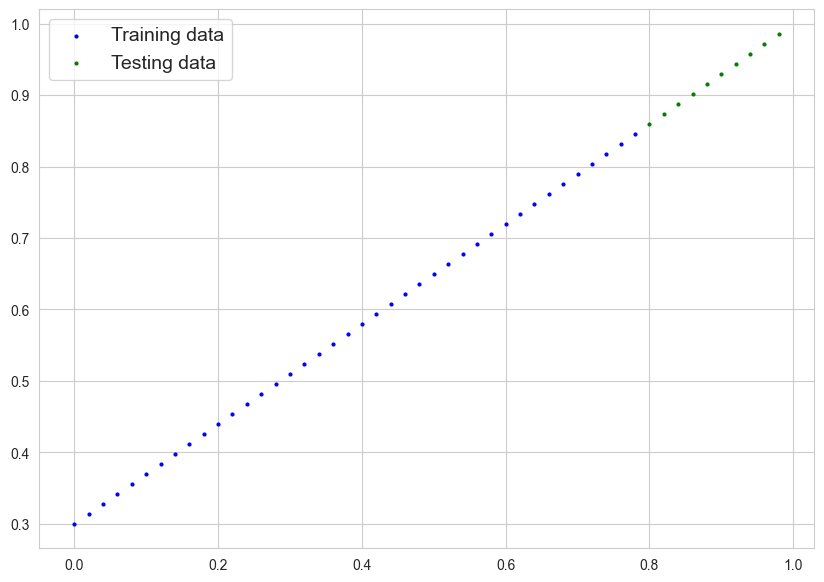

In [39]:
plot_predictions();

#### 2. Построение архитектуры модели:

In [40]:
# Create a Linear Regression model class
class LinearRegressionModel(torch.nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient #descent?)

        self.bias = torch.nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [41]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [44]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


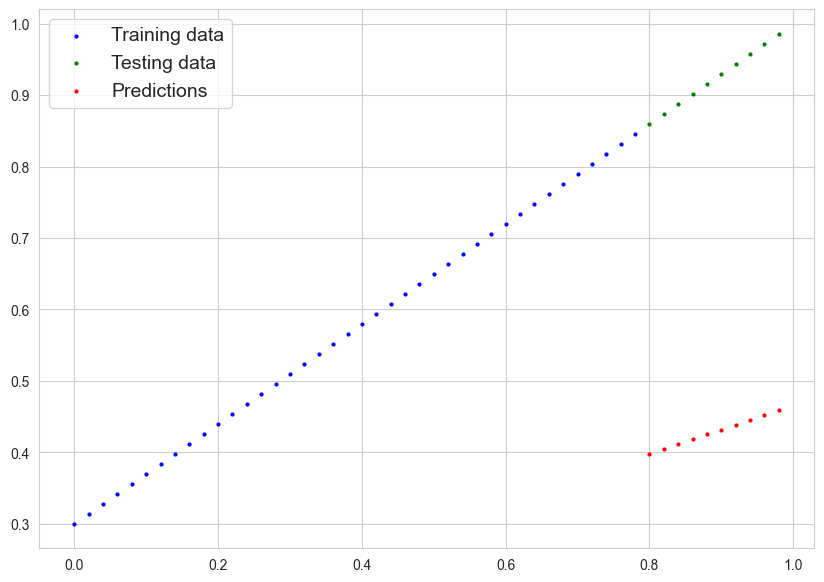

In [45]:
plot_predictions(predictions=y_preds)

#### 3. Тренировка модели:

In [46]:
# Create the loss function
loss_fn = torch.nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step

In [50]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 400

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.0089

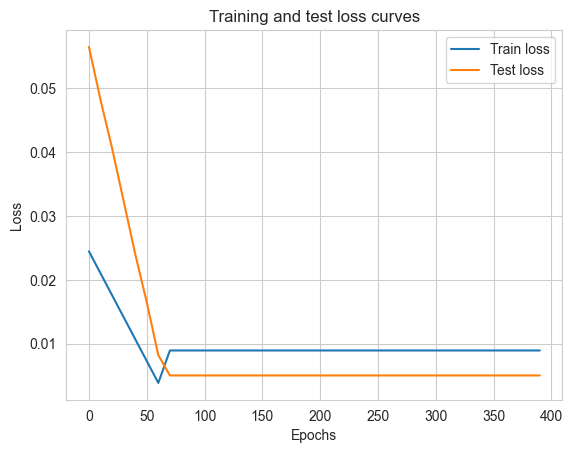

In [51]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [52]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


#### 5. Использование модели для предсказаний:

In [53]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

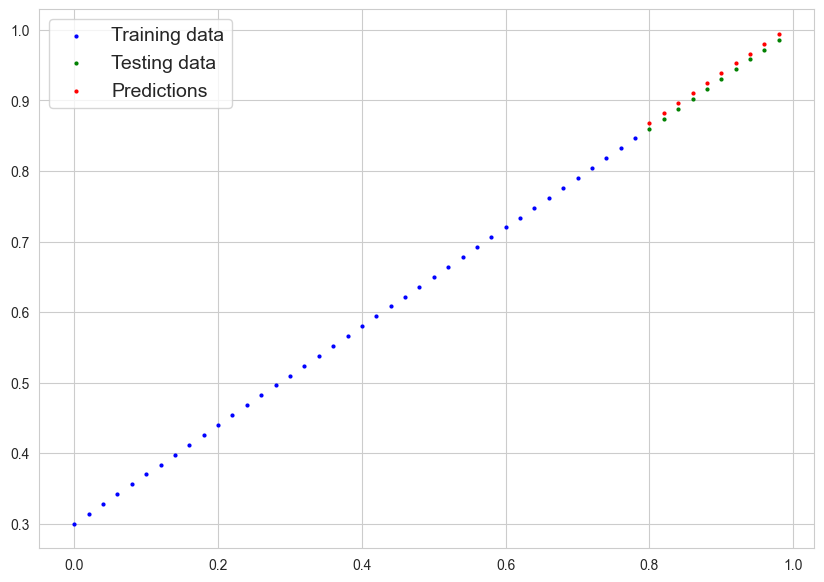

In [54]:
plot_predictions(predictions=y_preds)